In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import statistics
import sorting as swp

In [73]:
data = np.fromfile('05.bin', dtype=np.dtype('<l'))
data_len = len(data)
data = np.array([data * 0.001])

data_clear = np.fromfile('05.bin', dtype=np.dtype('<l'))
data_clear = data_clear * 0.001

In [74]:
print(data)

[[ -3.38   -2.769  -0.137 ... -11.23   -0.504  16.64 ]]


In [75]:
len(data_clear)

240000

In [76]:
from scipy.stats.mstats import mquantiles
np.set_printoptions(precision=3)
[mquantiles(x,prob=[0,0.25,0.5,0.75,1]) for x in data]

[array([-48.393,  -3.99 ,  -0.13 ,   3.83 ,  64.476])]

(4.03, 4.08)

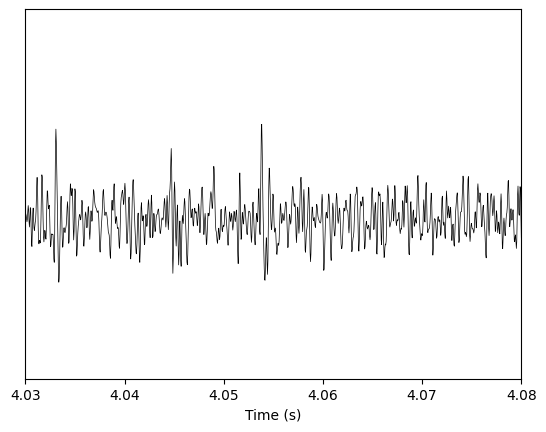

In [77]:
tt = np.arange(0,data_len)/2.4e4
swp.plot_data_list(data,tt,0.5)
plt.xlim([4.03,4.08])

In [78]:
data_mad = list(map(swp.mad,data))
data_mad

[5.7925182]

In [79]:
data = list(map(lambda x: (x-np.median(x))/swp.mad(x), data))

In [80]:
print(data)

[array([-5.611e-01, -4.556e-01, -1.208e-03, ..., -1.916e+00, -6.457e-02,
        2.895e+00])]


(-5.0, 10.0)

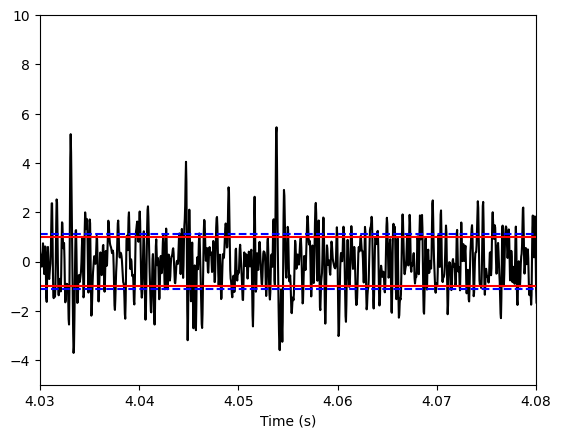

In [82]:
plt.plot(tt,data[0],color="black")
plt.xlim([4.03,4.08])
plt.ylim([-17,13])
plt.axhline(y=1,color="red")
plt.axhline(y=-1,color="red")
plt.axhline(y=np.std(data[0]),color="blue",linestyle="dashed")
plt.axhline(y=-np.std(data[0]),color="blue",linestyle="dashed")
plt.xlabel('Time (s)')
plt.ylim([-5,10])

(-30.0, 30.0)

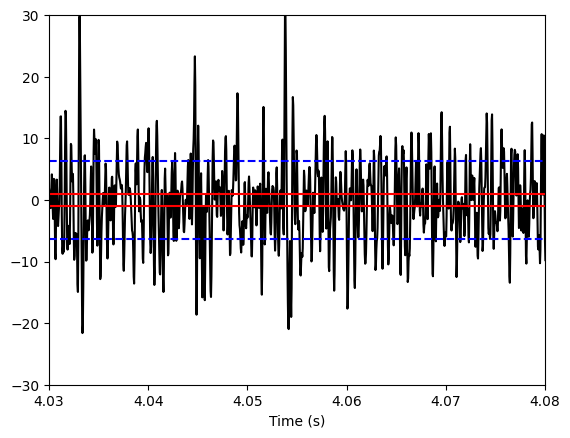

In [83]:
plt.plot(tt,data_clear,color="black")
plt.xlim([4.03,4.08])
plt.axhline(y=1,color="red")
plt.axhline(y=-1,color="red")
plt.axhline(y=np.std(data_clear),color="blue",linestyle="dashed")
plt.axhline(y=-np.std(data_clear),color="blue",linestyle="dashed")
plt.xlabel('Time (s)')
plt.ylim([-30,30])

In [86]:
from scipy.signal import fftconvolve
from numpy import apply_along_axis as apply
data_filtered = apply(lambda x: fftconvolve(x,np.array([1,1,1,1,1])/5.,'same'), 1,np.array(data))
data_filtered = (data_filtered.transpose()/apply(swp.mad,1,data_filtered)).transpose()
data_filtered[data_filtered < 4] = 0

Text(0.5, 0, 'Time (s)')

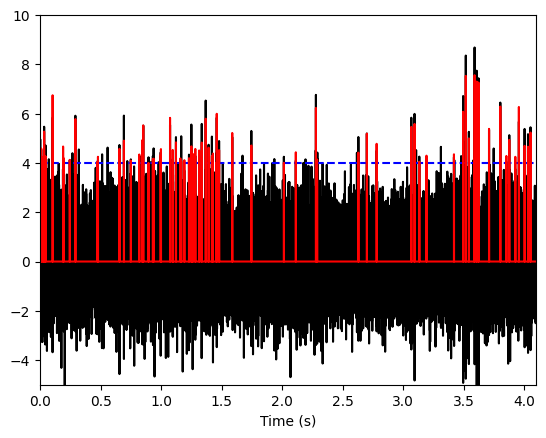

In [88]:
plt.plot(tt, data[0],color='black')
plt.axhline(y=4,color='blue',linestyle='dashed')
plt.plot(tt, data_filtered[0,],color='red')
plt.ylim([-5,10])
plt.xlim([0,4.1])
plt.xlabel('Time (s)')

In [94]:
print(scipy.signal.fftconvolve(data_filtered.sum(0),np.array([1,0,-1])/2.,'same') )

sp0 = swp.peak(data_filtered.sum(0))
len(sp0)

[-6.690e-17 -1.368e-17 -3.135e-17 ... -1.242e-17  2.292e-18 -4.502e-17]


227

In [90]:
sp0

array([    24,    220,    558,    803,   1085,   2481,   4563,   4652,
         5886,   7000,  11390,  11479,  15738,  16626,  17997,  19674,
        20280,  20463,  21507,  22371,  22521,  23927,  23971,  25778,
        26308,  26369,  26954,  27833,  27997,  28616,  29537,  30009,
        30271,  30794,  31557,  32071,  32852,  33427,  34083,  34284,
        34942,  35044,  35510,  38119,  41907,  48363,  50729,  54717,
        54952,  63142,  64824,  66763,  73644,  74285,  75229,  76656,
        82104,  83922,  84451,  85060,  86112,  86196,  86614,  86978,
        89063,  91299,  92501,  93079,  94280,  94983,  96119,  96794,
        97291,  98480,  98838,  99217,  99655, 101147, 101382, 101400,
       102466, 102924, 104071, 104760, 104820, 105143, 105547, 108965,
       108997, 109687, 113832, 113950, 114002, 114089, 114153, 114226,
       114325, 114415, 114483, 114547, 114591, 115120, 115509, 115769,
       116285, 116337, 116363, 116385, 116490, 117370, 117602, 118482,
      

(0.0, 1.0)

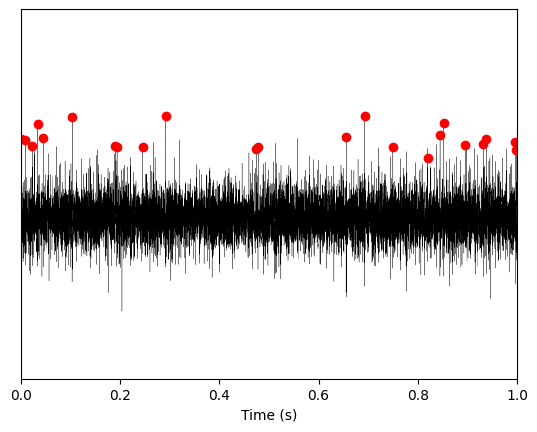

In [92]:
swp.plot_data_list_and_detection(data,tt,sp0)
plt.xlim([0,1])

In [266]:
visited = [False] * len(data_clear)
dataset = []
for x in sp0:
    start = x-24
    end = x+24
    visited[start:end] = [True] * (end-start)
    dataset.append([data_clear[x-24:x+24].tolist(), 1])

for x in range(0, len(data_clear), 48):
    if not any(visited[x:x+48]):
        dataset.append([data_clear[x:x+48].tolist(), 0])

In [268]:
len(dataset)

4979

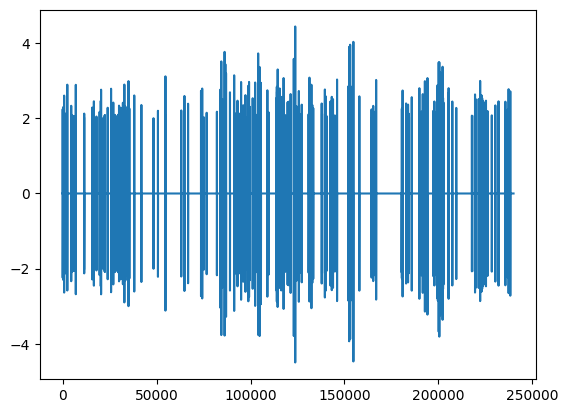

In [101]:
dx = scipy.signal.fftconvolve(data_filtered.sum(0),np.array([1,0,-1])/2.,'same')

plt.plot(dx)


In [4]:
import os
from scipy.stats.mstats import mquantiles
from scipy.signal import fftconvolve
from numpy import apply_along_axis as apply
dataset = []

for file in os.listdir("./test"):
    if file.endswith(".bin"):
        data = np.fromfile(os.path.join("test", file), dtype=np.dtype('<l'))
        data_len = len(data)
        data = np.array([data * 0.001])

        data_clear = np.fromfile(os.path.join("test", file), dtype=np.dtype('<l'))
        data_clear = data_clear * 0.001
        
        np.set_printoptions(precision=3)
        [mquantiles(x,prob=[0,0.25,0.5,0.75,1]) for x in data]

        data_mad = list(map(swp.mad,data))
        data = list(map(lambda x: (x-np.median(x))/swp.mad(x), data))

        data_filtered = apply(lambda x: fftconvolve(x,np.array([1,1,1,1,1])/5.,'same'), 1,np.array(data))
        data_filtered = (data_filtered.transpose()/apply(swp.mad,1,data_filtered)).transpose()
        data_filtered[data_filtered < 4] = 0

        sp0 = swp.peak(data_filtered.sum(0))
        visited = [False] * len(data_clear)
        iter_pos = 0
        for x in sp0:
            start = x-24
            end = x+24
            visited[start:end] = [True] * (end-start)
            dataset.append([data_clear[x-24:x+24].tolist(), 1])
            iter_pos +=1

        iter = 0
        for x in range(0, len(data_clear), 48):
            if not any(visited[x:x+48]):
                iter +=1
                dataset.append([data_clear[x:x+48].tolist(), 0])


In [5]:
import csv
with open("test.csv", 'w', newline='') as outcsv:   
    writer = csv.writer(outcsv, delimiter=',')
    for item in dataset:
        item[0].append(item[1])
        writer.writerow(item[0])